# Class 9: pandas Series and Data Frames

Today we will continue our exploration of pandas DataFrames which allow us to analyze data tables.

### Downloading the data for today's class

Please run the code in the cell below to download the data for today's class.

In [82]:
import YData

# YData.download.download_class_code(9)       # get class code    
# YData.download.download_class_code(9, True) # get the code with the answers 
# YData.download_homework(4)  # download the homework 

YData.download.download_data("dow.csv")
YData.download_data("nyc23_flights.csv")
YData.download_data("nyc23_airlines.csv")
YData.download_data("nyc23_weather.csv")


The file `dow.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nyc23_flights.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nyc23_airlines.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nyc23_weather.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [83]:
## If you are using Google Colabs, you should install the YData packages and mount the your google drive by uncommenting and running the code below.

# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')


In [84]:
# import the numpy package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## DataFrames (and flight delays) continued...

Let's continue our exploration of pandas DataFrames by continuing to analyze our flight delays dataset. 

The code below loads the data into a pandas DataFrame named `flights` and sets the Index to be the airplane's [tail number](https://en.wikipedia.org/wiki/Tail_number). Some variables of interest in this DataFrame are:

- `year`, `month`, `day`: Date of departure 
- `dep_time`, `arr_time`: Actual departure and arrival times, [UTC](https://en.wikipedia.org/wiki/UTC_offset) 
- `sched_dep_time`, `sched_arr_time`: Scheduled departure and arrival times, UTC 
- `dep_delay`, `arr_delay`: Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- `hour`, `minute`: Time of scheduled departure broken into hour and minutes.
- `carrier`: Two letter carrier abbreviation. See get_airlines to get the full name.
- `flight` Flight number.
- `origin`, `dest`: Origin and destination airport. See get_airports for additional metadata.
- `air_time`: Amount of time spent in the air, in minutes.
- `distance`: Distance between airports, in miles.
- `time_hour`: Scheduled date and hour of the flight as a POSIXct date. Along with origin, can be used to join flights data to weather data.

The first 3 rows of this DataFrame are shown below. 



In [85]:
#import YData
#YData.download_data("nyc23_flights.csv")

flights_all = pd.read_csv("nyc23_flights.csv", index_col="tailnum") #, parse_dates=[18])

flights = flights_all[['arr_delay', 'dep_delay', 'carrier', 'flight', 'arr_time', 'dep_time',  'origin', 'dest', 'air_time', 'distance', 'time_hour']]

flights.head(3)


,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
tailnum,,,,,,,,,,,
N25201,205.0,203.0,UA,628,328.0,1.0,EWR,SMF,367.0,2500,2023-01-01 20:00:00
N830DN,53.0,78.0,DL,393,228.0,18.0,JFK,ATL,108.0,760,2023-01-01 23:00:00
N807JB,34.0,47.0,B6,371,500.0,31.0,JFK,BQN,190.0,1576,2023-01-01 23:00:00


### Selecting columns from a DataFrame

We can select columns from a DataFrame using the square brackets; e.g., `my_df["my_col"]`

If we'd like to select multiple columns we can pass a list; e.g., `my_df[["col1", "col2"]]`


In [86]:
# Get just the arrival delay
# Be careful: if you just use a ["Col_name"] it will return it as a Series!

arrival_delays = flights["arr_delay"]

arrival_delays


tailnum
N25201    205.0
N830DN     53.0
N807JB     34.0
N265JB    166.0
N17730    211.0
          ...  
N647NK    -21.0
N566JB     47.0
N793JB    -12.0
N807JB      7.0
N994JL     38.0
Name: arr_delay, Length: 435352, dtype: float64

In [87]:
# we can also get a single column using the .col_name 

arrival_delays2 =  flights.arr_delay

arrival_delays2

tailnum
N25201    205.0
N830DN     53.0
N807JB     34.0
N265JB    166.0
N17730    211.0
          ...  
N647NK    -21.0
N566JB     47.0
N793JB    -12.0
N807JB      7.0
N994JL     38.0
Name: arr_delay, Length: 435352, dtype: float64

In [88]:
# if you want to get a single column as a DataFrame, pass a list in the [] brackets

arrival_delays_df = flights[["arr_delay"]]

arrival_delays_df.head()  


,arr_delay
tailnum,
N25201,205.0
N830DN,53.0
N807JB,34.0
N265JB,166.0
N17730,211.0


In [89]:
# get multiple columns as a DataFrame

depart_arrival_delay = flights[["dep_delay", "arr_delay"]]

depart_arrival_delay


,dep_delay,arr_delay
tailnum,,
N25201,203.0,205.0
N830DN,78.0,53.0
N807JB,47.0,34.0
N265JB,173.0,166.0
N17730,228.0,211.0
...,...,...
N647NK,-6.0,-21.0
N566JB,53.0,47.0
N793JB,-11.0,-12.0


### Getting a subset of rows from a DataFrame

Similar to pandas Series, we can get particular rows from a DataFrame using:

- `.loc`:  Get rows by Index values - and by Boolean masks
- `.iloc`.:  Get rows by their index number



In [91]:
# Extract rows based on the Index name "N25201"

flights.loc["N25201"]


,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
tailnum,,,,,,,,,,,
N25201,205.0,203.0,UA,628,328.0,1.0,EWR,SMF,367.0,2500,2023-01-01 20:00:00
N25201,-4.0,1.0,UA,683,1712.0,1411.0,EWR,IAH,213.0,1400,2023-01-07 14:00:00
N25201,9.0,17.0,UA,542,1602.0,1452.0,EWR,BOS,49.0,200,2023-01-18 14:00:00
N25201,108.0,115.0,UA,580,53.0,2224.0,EWR,ATL,119.0,746,2023-01-19 20:00:00
N25201,6.0,7.0,UA,320,1452.0,1155.0,EWR,MCO,149.0,937,2023-01-20 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...
N25201,2.0,11.0,UA,137,1913.0,1649.0,EWR,JAX,113.0,820,2023-12-15 16:00:00
N25201,3.0,2.0,UA,565,2315.0,2159.0,EWR,ROC,44.0,246,2023-12-16 21:00:00
N25201,34.0,17.0,UA,692,1215.0,852.0,EWR,PBI,172.0,1023,2023-12-17 08:00:00


In [92]:
# Extract a row based on the row number (get row 0 to 3)
flights.iloc[0:3]

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
tailnum,,,,,,,,,,,
N25201,205.0,203.0,UA,628,328.0,1.0,EWR,SMF,367.0,2500,2023-01-01 20:00:00
N830DN,53.0,78.0,DL,393,228.0,18.0,JFK,ATL,108.0,760,2023-01-01 23:00:00
N807JB,34.0,47.0,B6,371,500.0,31.0,JFK,BQN,190.0,1576,2023-01-01 23:00:00


In [93]:
# We can get multiple rows that meet particular conditions using Boolean masking

# flights leaving JFK
left_jfk = flights["origin"] == "JFK"

print(left_jfk)

np.sum(left_jfk)

tailnum
N25201    False
N830DN     True
N807JB     True
N265JB     True
N17730    False
          ...  
N647NK    False
N566JB     True
N793JB     True
N807JB     True
N994JL     True
Name: origin, Length: 435352, dtype: bool


np.int64(133048)

In [94]:
# extract the rows the correspond to JFK
jfk_flights = flights.loc[left_jfk]   # actually works even without the .loc

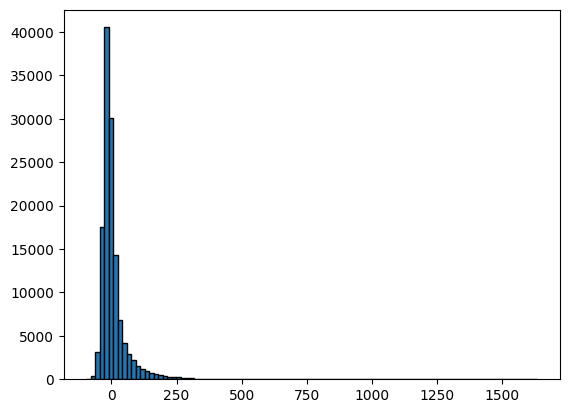

In [95]:
import matplotlib.pyplot as plt

# visualize JFK flight delays as a histogram
plt.hist(jfk_flights["arr_delay"], bins = 100, edgecolor = "k");


### Sorting values in a DataFrame

We can sort values in a DataFrame using `.sort_values("col_name")`

We can sort from highest to lowest by setting the argument `ascending = False`


In [96]:
# Sort the data by arrival delay

flights.sort_values("arr_delay").head()

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
tailnum,,,,,,,,,,,
N535DN,-97.0,-7.0,DL,114,1054.0,838.0,JFK,SAN,299.0,2446,2023-12-25 08:00:00
N535DN,-96.0,-3.0,DL,157,2208.0,1956.0,JFK,SAN,296.0,2446,2023-12-26 19:00:00
N980JT,-92.0,-1.0,B6,242,1823.0,1547.0,JFK,SFO,312.0,2586,2023-06-07 15:00:00
N102NN,-92.0,-8.0,AA,336,1118.0,907.0,JFK,SNA,289.0,2454,2023-04-11 09:00:00
N706TW,-91.0,-11.0,DL,89,1941.0,1659.0,JFK,SFO,321.0,2586,2023-12-26 17:00:00


In [97]:
# What is the longest arrival delay? 

flights.sort_values("arr_delay", ascending = False).head()

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
tailnum,,,,,,,,,,,
N195UW,1812.0,1813.0,AA,645,2155.0,1953.0,EWR,CLT,86.0,529,2023-12-17 13:00:00
N958NN,1772.0,1781.0,AA,992,1407.0,1240.0,EWR,ORD,102.0,719,2023-10-01 06:00:00
N808AW,1737.0,1742.0,AA,518,1315.0,1201.0,LGA,DCA,42.0,214,2023-04-25 06:00:00
N967AN,1647.0,1665.0,AA,600,2352.0,2045.0,LGA,DFW,223.0,1389,2023-02-07 17:00:00
N153UW,1633.0,1627.0,AA,322,1135.0,926.0,JFK,CLT,80.0,541,2023-04-20 06:00:00


### Adding new columns to a Data Frame

We can add a column to a data frame using square backets. For example: 

- `my_df["new col"] = my_df["col1"] + my_df["col2"]`.




Let's add a column called "madeup_time" which has the reduction in delay from when the flight left (`dep_delay`) to when it arrived (`arr_delay`).

In [98]:
# copy the data 
flights2 = flights.copy()

# calculate how many minutes were made up in flight
madeup_time = flights2["dep_delay"] - flights2["arr_delay"]


# add change column
flights2["madeup_time"] =  madeup_time


flights2.head()

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,madeup_time
tailnum,,,,,,,,,,,,
N25201,205.0,203.0,UA,628,328.0,1.0,EWR,SMF,367.0,2500,2023-01-01 20:00:00,-2.0
N830DN,53.0,78.0,DL,393,228.0,18.0,JFK,ATL,108.0,760,2023-01-01 23:00:00,25.0
N807JB,34.0,47.0,B6,371,500.0,31.0,JFK,BQN,190.0,1576,2023-01-01 23:00:00,13.0
N265JB,166.0,173.0,B6,1053,238.0,33.0,JFK,CHS,108.0,636,2023-01-01 21:00:00,7.0
N17730,211.0,228.0,UA,219,223.0,36.0,EWR,DTW,80.0,488,2023-01-01 20:00:00,17.0


In [99]:
# sort the values
display(flights2.sort_values("madeup_time").head())


# sort the data from largest to smallest
display(flights2.sort_values("madeup_time", ascending = False).head())


,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,madeup_time
tailnum,,,,,,,,,,,,
N241SY,317.0,-4.0,OO,1257,2145.0,1451.0,JFK,IAD,64.0,228,2023-09-08 14:00:00,-321.0
N518DQ,287.0,13.0,DL,278,334.0,1912.0,JFK,PHX,597.0,2153,2023-11-10 18:00:00,-274.0
N605JB,241.0,11.0,B6,245,114.0,1838.0,JFK,LAS,281.0,2248,2023-07-29 18:00:00,-230.0
N410UA,191.0,-14.0,UA,214,2112.0,1445.0,EWR,AUS,245.0,1504,2023-04-15 14:00:00,-205.0
N952NK,293.0,92.0,NK,340,2057.0,1429.0,EWR,FLL,165.0,1065,2023-09-08 12:00:00,-201.0


,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,madeup_time
tailnum,,,,,,,,,,,,
N706NK,279.0,380.0,NK,292,2104.0,1850.0,LGA,DFW,169.0,1389,2023-07-25 12:00:00,101.0
N535DN,-96.0,-3.0,DL,157,2208.0,1956.0,JFK,SAN,296.0,2446,2023-12-26 19:00:00,93.0
N976JT,-57.0,35.0,B6,242,1858.0,1623.0,JFK,SFO,309.0,2586,2023-06-13 15:00:00,92.0
N980JT,-92.0,-1.0,B6,242,1823.0,1547.0,JFK,SFO,312.0,2586,2023-06-07 15:00:00,91.0
N535DN,-97.0,-7.0,DL,114,1054.0,838.0,JFK,SAN,299.0,2446,2023-12-25 08:00:00,90.0


We can rename columns by:
1. Creating a `rename_dictionary` dictionary that maps old column names to new column names
2. By passing this dictionary to the `my_df.rename(columns = rename_dictionary)` method

In [100]:
# Rename the Percent change column
rename_dictionary = {"madeup_time": "delay_reduction"}
flights2 = flights2.rename(columns = rename_dictionary)
flights2.head(3)

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,delay_reduction
tailnum,,,,,,,,,,,,
N25201,205.0,203.0,UA,628,328.0,1.0,EWR,SMF,367.0,2500,2023-01-01 20:00:00,-2.0
N830DN,53.0,78.0,DL,393,228.0,18.0,JFK,ATL,108.0,760,2023-01-01 23:00:00,25.0
N807JB,34.0,47.0,B6,371,500.0,31.0,JFK,BQN,190.0,1576,2023-01-01 23:00:00,13.0


### Getting aggregate statistics by group

We can get aggregate statistics by group using `groupby()` and `agg` methods using the following syntax:

`my_df.groupby("col_name").agg("agg_function_name")`

Can you get the average delay for each airline? 


In [101]:
# What was the average delay for each airline? 

mean_delays = flights[["carrier", "arr_delay"]].groupby("carrier").agg("mean")

display(mean_delays.head())


mean_delays.sort_values("arr_delay", ascending = False).head()

,arr_delay
carrier,
9E,-2.231381
AA,5.272403
AS,0.084432
B6,15.612912
DL,1.644258


,arr_delay
carrier,
F9,26.243842
HA,21.414365
B6,15.612912
OO,13.711405
NK,9.888686


There are several ways to get multiple statistics by group. Perhaps the most useful way is to use the syntax:

<pre>
my_df.groupby("group_col_name").agg(
   new_col1 = ('col_name', 'statistic_name1'),
   new_col2 = ('col_name', 'statistic_name2'),
   new_col3 = ('col_name', 'statistic_name3')
)
</pre>


Let's create a DataFrame that has for each carrier:
1. The number of flights 
2. The max departure delay
3. The median arrival delay

In [102]:
flights.groupby('carrier').agg(
    max_dep_delay = ('dep_delay', 'max'),
    median_arr_delay = ('arr_delay', 'median'),
    n = ('carrier', 'count')
)

,max_dep_delay,median_arr_delay,n
carrier,,,
9E,1136.0,-13.0,54141
AA,1813.0,-10.0,40525
AS,991.0,-12.0,7843
B6,1019.0,-4.0,66169
DL,1158.0,-12.0,61562
F9,1161.0,2.0,1286
G4,1380.0,-14.0,671
HA,1101.0,9.0,366
MQ,161.0,-8.0,357


![grumpy](http://www.quickmeme.com/img/17/1702cb8d3730013bdff1203920324ab55a244f0061cfaa118af059b683e2d275.jpg)

## "Joining" DataFrames by Index

To explore joining DataFrames, let's load the airline names into a DataFrames into a DataFrame called `airline_names`. 

Let's also set the Index for both the `airline_names` and `flights` to be the airline carrier code. 

For demonstration purposes, let's also do the following: 

1. Reduce the `flights` DataFrame to only have information on American Airlines (AA), Jet Blue (B6) and United Air Lines Inc. (UA) and save it to the name `flights_3_carriers`.

2. Reduce `airline_names` to the first 10 entries (thus removing United Airlines), and save it to the name `airline_names_reduced` 



In [103]:
flights_3_carriers = flights.reset_index().set_index("carrier")

# just get flights from American Airlines (AA), Jet Blue (B6) and Delta (DL) 
flights_3_carriers = flights_3_carriers.loc[["AA", "B6", "UA"]].sort_values("time_hour")

flights_3_carriers.head()


,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
carrier,,,,,,,,,,,
AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00
B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00
B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00
UA,N13113,68.0,17.0,206,926.0,537.0,EWR,IAH,258.0,1400,2023-01-01 05:00:00
B6,N2043J,-1.0,10.0,996,948.0,520.0,JFK,BQN,192.0,1576,2023-01-01 05:00:00


In [104]:
airline_names = pd.read_csv("nyc23_airlines.csv", index_col = "carrier")
airline_names_reduced = airline_names.iloc[0:10]

airline_names_reduced

,name
carrier,
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
F9,Frontier Airlines Inc.
G4,Allegiant Air
HA,Hawaiian Airlines Inc.
MQ,Envoy Air


When two DataFrames have the same Index values, we can use the `.join()` method to join them.

In [105]:
# Let's do a left join by setting how = "left"
left_joined = flights_3_carriers.join(airline_names_reduced, how = "left") 
left_joined

,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,name
carrier,,,,,,,,,,,,
AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00,American Airlines Inc.
B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00,JetBlue Airways
B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00,JetBlue Airways
UA,N13113,68.0,17.0,206,926.0,537.0,EWR,IAH,258.0,1400,2023-01-01 05:00:00,NaN
B6,N2043J,-1.0,10.0,996,948.0,520.0,JFK,BQN,192.0,1576,2023-01-01 05:00:00,JetBlue Airways
...,...,...,...,...,...,...,...,...,...,...,...,...
UA,N37308,-26.0,-8.0,471,2248.0,2147.0,EWR,PWM,44.0,284,2023-12-31 21:00:00,NaN
UA,N27253,-22.0,3.0,565,2308.0,2207.0,EWR,ROC,42.0,246,2023-12-31 22:00:00,NaN
B6,N793JB,-12.0,-11.0,283,338.0,2248.0,JFK,PSE,207.0,1617,2023-12-31 22:00:00,JetBlue Airways


In [106]:
# Let's do a right join by setting how = "right"  
right_joined = flights_3_carriers.join(airline_names_reduced, how = "right") 
right_joined

,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,name
carrier,,,,,,,,,,,,
9E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
AA,N925AN,-7.0,3.0,499.0,808.0,503.0,EWR,MIA,154.0,1085.0,2023-01-01 05:00:00,American Airlines Inc.
AA,N918AN,-25.0,-6.0,981.0,645.0,524.0,EWR,ORD,119.0,719.0,2023-01-01 05:00:00,American Airlines Inc.
AA,N886NN,-14.0,-7.0,518.0,857.0,552.0,LGA,MIA,159.0,1096.0,2023-01-01 05:00:00,American Airlines Inc.
AA,N402AN,-13.0,-10.0,990.0,1004.0,649.0,LGA,MIA,163.0,1096.0,2023-01-01 06:00:00,American Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...
F9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Frontier Airlines Inc.
G4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Allegiant Air
HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian Airlines Inc.


### "Merging" DataFrames by column values

If we want to join by value in a column rather than by Index value we can use the `.merge()` method (which is very similar to the `.join()` method). 


In [107]:
# reset the index of flights_3_carriers
flights_3_carriers2 = flights_3_carriers.reset_index()
flights_3_carriers2.head(3)

,carrier,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
0,AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00
1,B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00
2,B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00


In [108]:
# reset the index of airline_names_reduced
airline_names_reduced2 = airline_names_reduced.reset_index()
airline_names_reduced2.head(3)

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.


In [109]:
# use the .merge() method to join the DataFrames

left_joined2 = flights_3_carriers2.merge(airline_names_reduced2, how = "left") 
left_joined2

,carrier,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,name
0,AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00,American Airlines Inc.
1,B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00,JetBlue Airways
2,B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00,JetBlue Airways
3,UA,N13113,68.0,17.0,206,926.0,537.0,EWR,IAH,258.0,1400,2023-01-01 05:00:00,NaN
4,B6,N2043J,-1.0,10.0,996,948.0,520.0,JFK,BQN,192.0,1576,2023-01-01 05:00:00,JetBlue Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186330,UA,N37308,-26.0,-8.0,471,2248.0,2147.0,EWR,PWM,44.0,284,2023-12-31 21:00:00,NaN
186331,UA,N27253,-22.0,3.0,565,2308.0,2207.0,EWR,ROC,42.0,246,2023-12-31 22:00:00,NaN
186332,B6,N793JB,-12.0,-11.0,283,338.0,2248.0,JFK,PSE,207.0,1617,2023-12-31 22:00:00,JetBlue Airways
186333,B6,N994JL,38.0,50.0,126,425.0,2345.0,JFK,SJU,201.0,1598,2023-12-31 22:00:00,JetBlue Airways


#### Merging with different column names

What if the columns we want to join on have different names, we can use the `left_on` and `right_on` arguments to specify which columns (i.e., keys) should be used to align the two DataFrames

In [110]:
flights_3_carriers3 = flights_3_carriers2.rename(columns = {"carrier": "Airline Code"})
flights_3_carriers3.head(3)

,Airline Code,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
0,AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00
1,B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00
2,B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00


In [111]:
airline_names_reduced3 = airline_names_reduced2.rename(columns = {"carrier": "Code"})

airline_names_reduced3.head(3)

,Code,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.


In [112]:
# merge the DataFrames specifying the column names to join on

left_joined3 = flights_3_carriers3.merge(airline_names_reduced3, how = "left", left_on = "Airline Code", right_on = "Code") 
left_joined3

,Airline Code,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,Code,name
0,AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00,AA,American Airlines Inc.
1,B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00,B6,JetBlue Airways
2,B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00,B6,JetBlue Airways
3,UA,N13113,68.0,17.0,206,926.0,537.0,EWR,IAH,258.0,1400,2023-01-01 05:00:00,NaN,NaN
4,B6,N2043J,-1.0,10.0,996,948.0,520.0,JFK,BQN,192.0,1576,2023-01-01 05:00:00,B6,JetBlue Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186330,UA,N37308,-26.0,-8.0,471,2248.0,2147.0,EWR,PWM,44.0,284,2023-12-31 21:00:00,NaN,NaN
186331,UA,N27253,-22.0,3.0,565,2308.0,2207.0,EWR,ROC,42.0,246,2023-12-31 22:00:00,NaN,NaN
186332,B6,N793JB,-12.0,-11.0,283,338.0,2248.0,JFK,PSE,207.0,1617,2023-12-31 22:00:00,B6,JetBlue Airways
186333,B6,N994JL,38.0,50.0,126,425.0,2345.0,JFK,SJU,201.0,1598,2023-12-31 22:00:00,B6,JetBlue Airways


#### Example: Spelling out names of airlines with the longest delays

Please try to create a DataFrame where the Index name is the full airline name, and the columns are:
- `mean_delay`: Has the mean arrival delay for each airline
- `median_delay`: Has the median arrival delay for each airline
- `count`: The number of flights that went into these averages

To do this, start with the `flights`, and the `airline_names` DataFrames and go from there. Also, be sure your results are sorted from the largest mean delay to the smallest mean delay


In [113]:

flights_with_names = flights.merge(airline_names.reset_index(), how = "left")

flights_with_names.head()

flights_with_names.groupby("name").agg(mean_delay = ("arr_delay", "mean"),
                                       median_delay = ("arr_delay", "median"),
                                       count = ("arr_delay", "count")).sort_values("mean_delay", ascending = False)


,mean_delay,median_delay,count
name,,,
Frontier Airlines Inc.,26.243842,2.0,1218
Hawaiian Airlines Inc.,21.414365,9.0,362
JetBlue Airways,15.612912,-4.0,64280
SkyWest Airlines Inc.,13.711405,-5.0,6199
Spirit Air Lines,9.888686,-7.0,14769
United Air Lines Inc.,9.042783,-6.0,77438
Southwest Airlines Co.,5.761869,-5.0,12048
American Airlines Inc.,5.272403,-10.0,39750
Delta Air Lines Inc.,1.644258,-12.0,60364


## Further flight delay explorations

See if you can calculate (and visualize) how the mean delay is affected by:

- The hour of the day a flight leaves?
- The month of the year?
- The different airports?

As a more challenging question, see if you calculate and visualize the mean delay as a function of the wind speed.

If you are interested in exploring further, you can also check out the following data:

- `nyc23_planes.csv`: Information about different airplanes 
- `nyc23_airports.csv`: The names of different airports

All these data sets can be downloaded using the `YData.download_data()` function. A codebook that contains information on the variables in these DataFrames can be found at: https://cran.r-project.org/web/packages/nycflights23/nycflights23.pdf 

#### Q1: Calculate and visualize how the average delay differs by the hour of the day a flight leaves

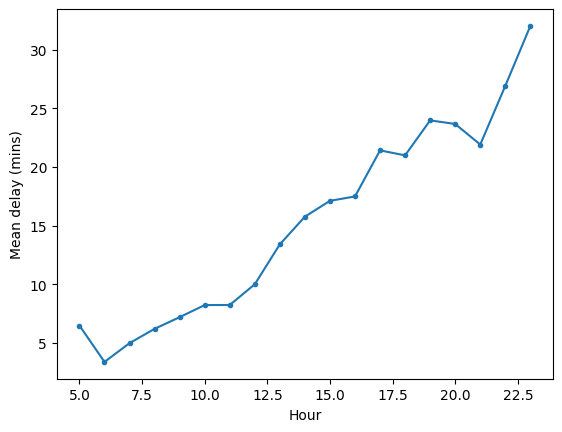

In [114]:
# reload the data so we have all the columns
flights = pd.read_csv("nyc23_flights.csv", index_col="tailnum")


delay_hour = flights.groupby("hour").agg(mean_delay = ("dep_delay", "mean"),
                                         median_delay = ("dep_delay", "median"),
                                         n = ("dep_delay", "count"))

plt.plot(delay_hour["mean_delay"], '.-');
plt.ylabel("Mean delay (mins)");
plt.xlabel("Hour");


#### Q2: Calculate and visualize how the average delay differs by the month of the year

       mean_delay  median_delay      n
month                                 
1       14.022910          -2.0  35531
2       11.014993          -3.0  34215
3       13.028325          -2.0  38941
4       17.682581          -2.0  36444
5        8.387143          -3.0  38562
6       24.387401          -1.0  33748
7       30.462939           1.0  33067
8       13.547497          -2.0  36139
9       17.309264          -3.0  33722
10       5.280174          -4.0  36538
11       4.402551          -4.0  34500
12       8.334869          -3.0  33207


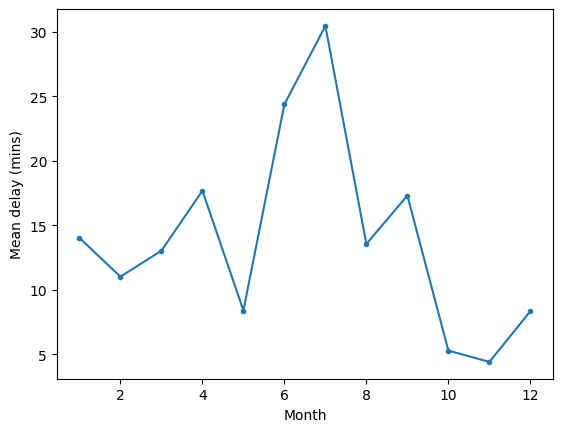

In [115]:
delay_month = flights.groupby("month").agg(mean_delay = ("dep_delay", "mean"),
                                         median_delay = ("dep_delay", "median"),
                                         n = ("dep_delay", "count"))

print(delay_month)

plt.plot(delay_month["mean_delay"], '.-');
plt.ylabel("Mean delay (mins)");
plt.xlabel("Month");

#### Q3: Calculate and visualize how the average delay is differs depending on the airport it leaves from

        mean_delay  median_delay       n
origin                                  
EWR      15.404068          -2.0  134945
JFK      15.904155          -2.0  130200
LGA      10.824166          -4.0  159469


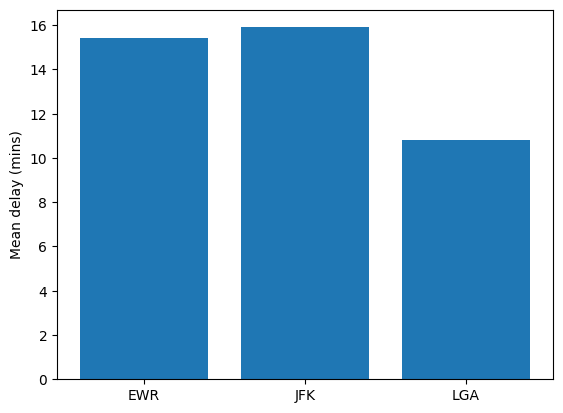

In [116]:
delay_airport = flights.groupby("origin").agg(mean_delay = ("dep_delay", "mean"),
                                         median_delay = ("dep_delay", "median"),
                                         n = ("dep_delay", "count"))

print(delay_airport)

plt.bar(delay_airport.reset_index()["origin"], delay_airport["mean_delay"]);
plt.ylabel("Mean delay (mins)");


#### Q4: Calculate and visualize how the average delay is differs depending on wind speed

The data on the weather for each day/time is loaded below.

All these data sets can be downloaded using the `YData.download_data()` function. A codebook that contains information on the variables in these DataFrames can be found at: https://cran.r-project.org/web/packages/nycflights23/nycflights23.pdf 


In [117]:
# Explore more on your own!  For example, you can examine how weather affects flight delays, etc.

#YData.download_data("nyc23_weather.csv")

weather = pd.read_csv("nyc23_weather.csv")


In [118]:
flights_weather = flights.merge(weather, how = "left", on = ["time_hour", "year", "month", "day", "hour", "origin"])

# check that the join worked as expected
print(flights_weather.columns)
flights_weather.shape[0] == flights.shape[0]

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour',
       'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust',
       'precip', 'pressure', 'visib'],
      dtype='object')


True

In [119]:
# Round the wind speed to whole numbers

flights_weather["wind_speed_rounded"] = np.round(weather.wind_speed)


,mean_delay,median_delay,n
wind_speed_rounded,,,
0.0,16.071429,-1.0,1232
2.0,14.492051,-1.0,1321
5.0,15.058089,-2.0,1842
6.0,14.696700,-2.0,4606
8.0,17.516939,-2.0,2391
9.0,17.193005,-2.0,2316
10.0,15.575703,-2.0,2206
12.0,16.022305,-1.0,1883
13.0,14.323061,-2.0,2823


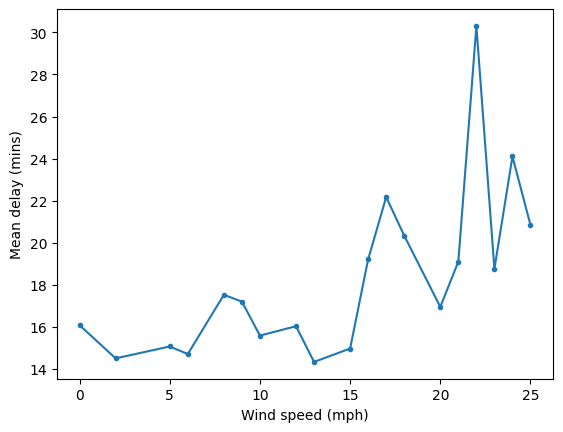

In [120]:
# Calculate how the delay is affeced by wind speed.
# Only use data where there are at least 30 points going in to the average

wind_delay = flights_weather.groupby("wind_speed_rounded").agg(mean_delay = ("dep_delay", "mean"),
                                                               median_delay = ("dep_delay", "median"),
                                                               n = ("dep_delay", "count"))
wind_delay = wind_delay.loc[wind_delay.n > 100]

display(wind_delay)

plt.plot(wind_delay["mean_delay"], '.-');
plt.xlabel("Wind speed (mph)");
plt.ylabel("Mean delay (mins)");

In [121]:
%%capture

# You can run this code to covert this Jupyter notebook into a pdf
!quarto render class_09_answers.ipynb --cache-refresh --to pdf 